In [165]:
# 作者：Irain
# QQ联系方式：2573396010
# 日期：2020年4月8日

%matplotlib inline
import pandas
import xlrd  #读取Excel文件的包
import xlsxwriter   #将文件写入Excel的包
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
#解决绘图中的中文字体显示问题
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
#seaborn下的直方图
import seaborn as sns
import warnings
import statsmodels.api as sm  # 拟合数据
warnings.filterwarnings('ignore')
data = pandas.read_excel('D:/Information/Working/pycharm/jike/venv/Try/ErShouCheZhiJia/ErSC_Thread/所有汽车清理数据/二手车之家的所有汽车原始数据.xlsx')
data = data.drop('Unnamed: 0', axis=1)
data = data[data['汽车售价/万'] < 100]   #  清洗少数售价 > 100
data = data[data['汽车原价/万'] < 200]   #  清洗少数原价 > 200 
data = data[data['售/原'] < 1]  # 清理比值为无限大
# data = data[data['汽车原价/万'] < 200]   #  清洗少数原价 > 200 
# data = data[(data['售/原'] * 0.01).index()]
# data
# data = data.drop(index=(data.loc[(data['售/原'] / 100)].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['颜色']=='[]')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['上牌时间'] =='未上牌')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['马力'] =='2\'')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['马力'] =='电动机')].index))  # 清洗异常数据
data = data.drop(index=(data.loc[(data['马力'] =='')].index))  # 清洗异常数据
data = data.fillna('0')  # 清洗null
data = data.drop(index=(data.loc[(data['马力'] =='0')].index))  # 清洗异常数据
data['马力'] = data['马力'].astype(float)
# data['马力'] = data['马力'].map(lambda x:x.replace('马', '').replace(' ','').replace("\n", "").replace("\t", "").replace("力", ""))  # 清洗售价

data1 = data
data

,汽车款式,汽车售价/万,汽车原价/万,驾驶行程/万公里,保险到期,上牌时间,排量/L,马力,车身级别,颜色,燃油标号,汽车所在地,差价,售/原,汽车详情
0,宝马5系 2018款 530Li 领先型 豪华套装,41.28,51.98,1.60,2020-05,2019-05,2.0,252.0,中大型车,黑色,95,东莞,10.70,0.794152,https://www.che168.com/dealer/222776/36771978....
1,奔驰E级 2018款 改款 E 300 L 运动豪华型,40.80,54.58,3.00,2020-09,2018-09,2.0,245.0,中大型车,黑色,95,东莞,13.78,0.747527,https://www.che168.com/dealer/222776/36622916....
2,思迪 2007款 1.5L 自动豪华版,2.48,13.55,12.69,2020-12,2008-12,1.5,107.0,小型车,黑色,92,东莞,11.07,0.183026,https://www.che168.com/dealer/226320/36308322....
3,凯美瑞 2013款 2.0G 舒适版,10.98,20.60,15.00,2019-12,2013-12,2.0,148.0,中型车,黑色,92,东莞,9.62,0.533010,https://www.che168.com/dealer/219440/28728080....
4,奔驰C级 2018款 C 200 L 运动版,29.68,38.08,3.00,2020-9,2018-09,2.0,184.0,中型车,白色,95,东莞,8.40,0.779412,https://www.che168.com/dealer/109698/36785533....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26442,奔驰C级 2017款 改款 C 200 L 运动版,27.80,38.40,7.50,2020-09,2017-09,2.0,184.0,中型车,蓝色,95,韶关,10.60,0.723958,https://www.che168.com/dealer/338694/36562026....
26443,指南者(进口) 2013款 2.4L 四驱都市版,8.46,28.32,12.00,2020-05,2013-05,2.4,170.0,紧凑型SUV,白色,92,韶关,19.86,0.298729,https://www.che168.com/dealer/403056/36652192....
26444,传祺GS5 2014款 1.8T 自动两驱超享版,7.28,16.37,2.50,2020-10,2014-10,1.8,177.0,中型SUV,白色,92,韶关,9.09,0.444716,https://www.che168.com/dealer/344461/36490593....
26445,标致2008 2014款 1.6L 自动潮流版,5.60,11.91,7.00,2020-08,2016-08,1.6,117.0,小型SUV,白色,92,韶关,6.31,0.470193,https://www.che168.com/dealer/403056/36601480....


In [159]:
# data['汽车所在地'] = data['汽车所在地'].replace('云浮','其他') # 修改series值
data['汽车所在地'].value_counts()

东莞    5427
深圳    5022
广州    4803
佛山    4034
惠州    1397
汕头     903
江门     541
中山     529
揭阳     480
珠海     419
河源     390
梅州     298
清远     297
茂名     293
潮州     274
肇庆     263
韶关     220
湛江     188
阳江     120
云浮      39
汕尾      38
Name: 汽车所在地, dtype: int64

In [219]:
# 把少数归类其他
# cols = ['深圳','广州','佛山','惠州','汕头','江门','中山','揭阳','珠海','河源']
cols = ['汕尾','阳江','湛江','云浮','韶关','肇庆','潮州','清远','梅州','茂名','河源','珠海']
for i in cols:
    data['汽车所在地'] = data['汽车所在地'].replace(i,'其他') # 修改series值
data['汽车所在地'].value_counts()

东莞    5427
深圳    5022
广州    4803
佛山    4034
其他    2839
惠州    1397
汕头     903
江门     541
中山     529
揭阳     480
Name: 汽车所在地, dtype: int64

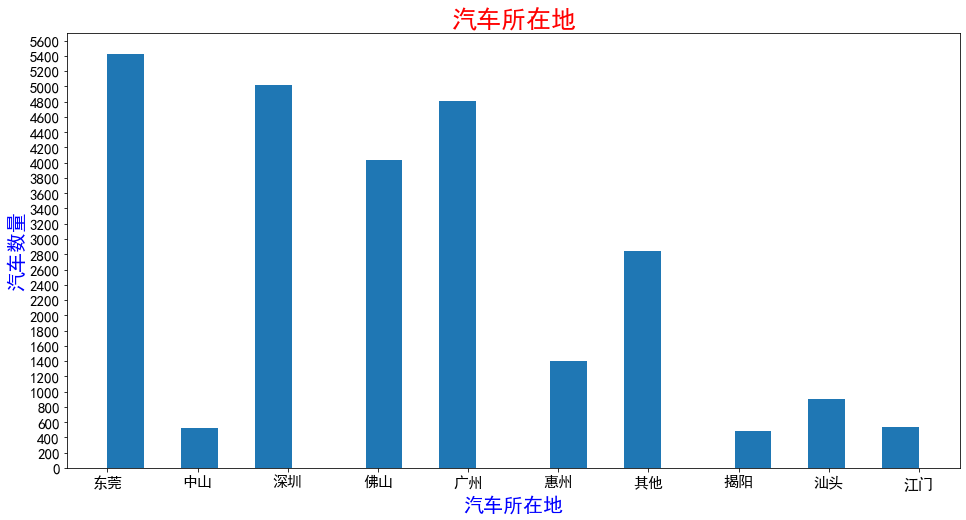

In [248]:
# 汽车所在地数量情况
fig , ax = plt.subplots(1,1, figsize=(16, 8))
# fig.suptitle("原价与售价对比",fontsize=20,x=0.5,y=0.95)  #  总图标题
ax.set_title("汽车所在地", fontsize=25, color = 'red')  # 子图标题
ax.hist(data['汽车所在地'],bins = 22)
plt.ylabel("汽车数量", fontsize=20, color = 'blue') #设置X轴Y轴名称 ，字体大小，颜色
plt.xlabel("汽车所在地", fontsize=20, color = 'blue') 
# plt.ylim(0,6500)  #设置Y轴上下限
# plt.tick_params(labelsize=20)  
plt.tick_params(labelsize=15)  # 刻度字体大小
# ax.xaxis.set_major_locator(MultipleLocator(10))  # x轴刻度值之家的差.
ax.yaxis.set_major_locator(MultipleLocator(200))  # y轴刻度值之家的差
# labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontname('Times New Roman') for label in labels]
# 给条形图添加数据标注
# for b in plt.bar:
#     highth = b.get_height()
#     ax.text(b.get_x() + b.get_width()/2 , highth, '%d'&int(highth), ha= 'center',va= 'bottom' )

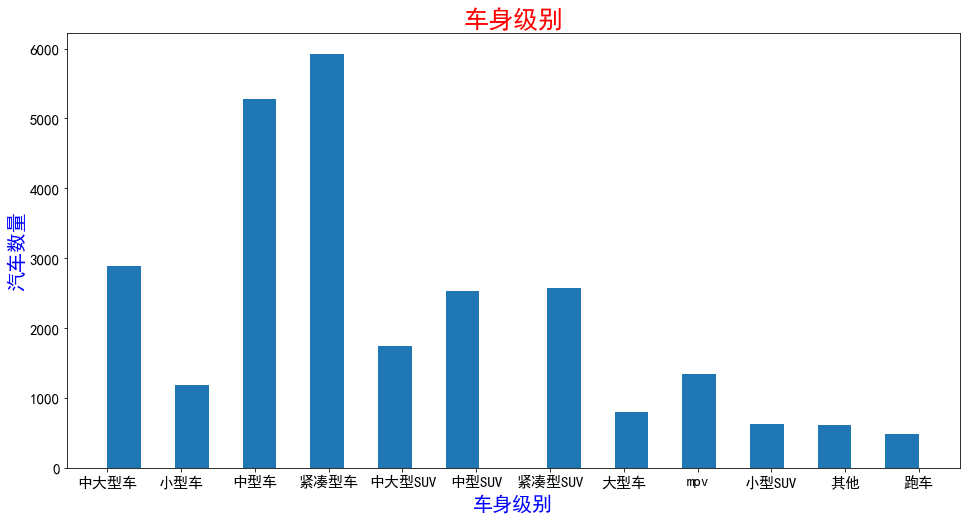

In [246]:
# 车身级别数量图
fig , ax = plt.subplots(1,1, figsize=(16, 8))
# fig.suptitle("原价与售价对比",fontsize=20,x=0.5,y=0.95)  #  总图标题
ax.set_title("车身级别", fontsize=25, color = 'red')  # 子图标题
ax.hist(data['车身级别'],bins = 24)
plt.ylabel("汽车数量", fontsize=20, color = 'blue') #设置X轴Y轴名称 ，字体大小，颜色
plt.xlabel("车身级别", fontsize=20, color = 'blue') 
# plt.ylim(0,6500)  #设置Y轴上下限 
plt.tick_params(labelsize=15)  # 刻度字体大小
# labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontname('Times New Roman', fontproperties='SimHei') for label in labels]
# ax.xaxis.set_major_locator(MultipleLocator(10))  # x轴刻度值之家的差.
# ax.yaxis.set_major_locator(MultipleLocator(500))  # y轴刻度值之家的差
# 给条形图添加数据标注
# for b in plt.bar:
#     highth = b.get_height()
#     ax.text(b.get_x() + b.get_width()/2 , highth, '%d'&int(highth), ha= 'center',va= 'bottom' )

In [255]:
# cols = ['紧凑型车','中型车','中大型车','紧凑型SUV','中型SUV','mpv','小型车','大型车','小型SUV','跑车']
col = ['微面','微型车','轻客','大型SUV','皮卡','微卡',]
for i in col:
    data['车身级别'] = data['车身级别'].replace(i,'其他') # 修改series值
data['车身级别'].value_counts()


紧凑型车      5928
中型车       5277
中大型车      2893
紧凑型SUV    2570
中型SUV     2528
中大型SUV    1748
mpv       1343
小型车       1180
大型车        800
小型SUV      623
其他         606
跑车         479
Name: 车身级别, dtype: int64

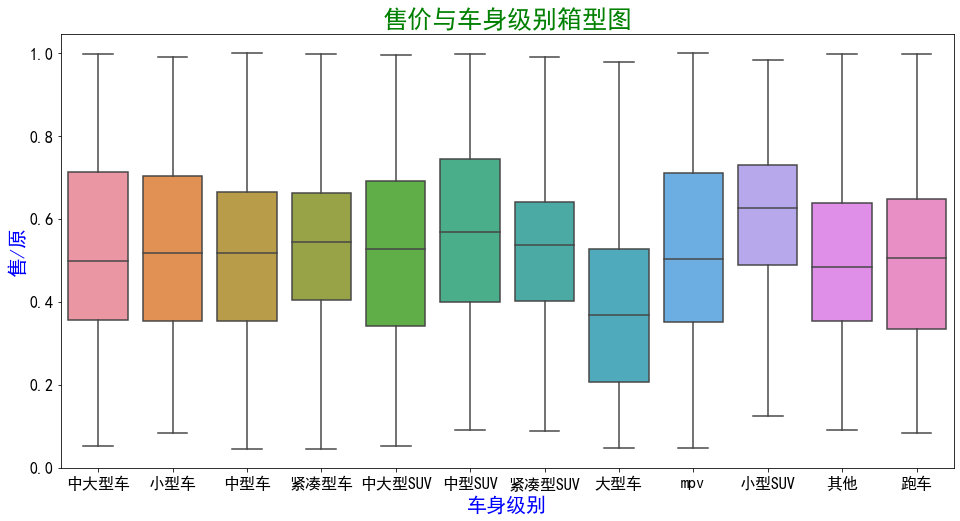

In [259]:
#售价与车身级别箱型图
plt.figure( figsize=(16, 8))
plt.title('售价与车身级别箱型图', fontsize = 25 ,c = 'green') # 主图主题名、大小、颜色
plt.ylabel("", fontsize=20, color = 'blue') #设置X轴Y轴名称(无效) ，字体大小，颜色
plt.xlabel("", fontsize=20, color = 'blue') 
plt.tick_params(labelsize=16)  # 刻度字体大小
sns.boxplot(y = data['售/原'], x = data['车身级别'])

In [261]:
from sklearn.linear_model import LinearRegression
# data['车身级别'] = month
X = data['车身级别'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['车身级别'], data['售/原'], c='black')
plt.plot( data['车身级别'], predictions, c='blue', linewidth=2)
plt.xlabel("上牌时间/月", fontsize= 20, c='blue')
plt.ylabel("售/原比值", fontsize= 20, c='blue')
plt.show()

ValueError: could not convert string to float: '中大型车'

In [262]:
data['颜色'].value_counts()

白色     9471
黑色     5461
银灰色    2553
香槟色    1687
红色     1635
蓝色     1579
棕色     1374
深灰色    1191
紫色      382
绿色      229
橙色      191
黄色      187
其他       35
Name: 颜色, dtype: int64

In [264]:
# cols = ['紧凑型车','中型车','中大型车','紧凑型SUV','中型SUV','mpv','小型车','大型车','小型SUV','跑车']
color = ['紫色','绿色','橙色','黄色',]
for i in color:
    data['颜色'] = data['颜色'].replace(i,'其他') # 修改series值
data['颜色'].value_counts()


白色     9471
黑色     5461
银灰色    2553
香槟色    1687
红色     1635
蓝色     1579
棕色     1374
深灰色    1191
其他     1024
Name: 颜色, dtype: int64

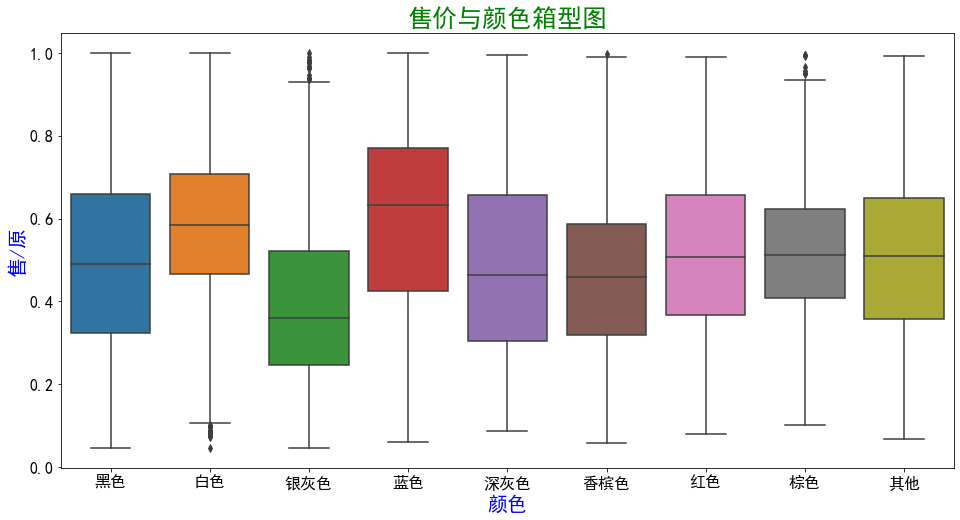

In [265]:
#售价与颜色箱型图
plt.figure( figsize=(16, 8))
plt.title('售价与颜色箱型图', fontsize = 25 ,c = 'green') # 主图主题名、大小、颜色
plt.ylabel("", fontsize=20, color = 'blue') #设置X轴Y轴名称(无效) ，字体大小，颜色
plt.xlabel("", fontsize=20, color = 'blue') 
plt.tick_params(labelsize=16)  # 刻度字体大小
sns.boxplot(y = data['售/原'], x = data['颜色'])

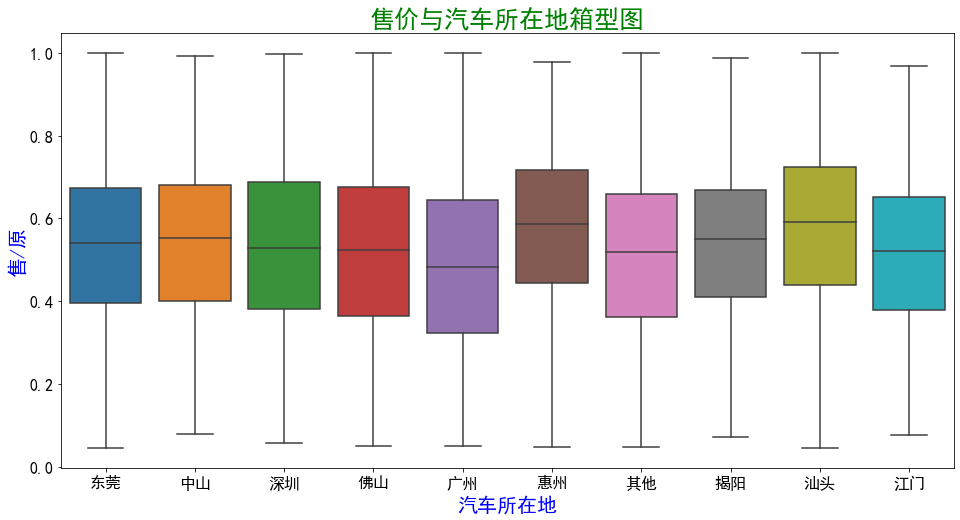

In [266]:
#售价与颜色箱型图
plt.figure( figsize=(16, 8))
plt.title('售价与汽车所在地箱型图', fontsize = 25 ,c = 'green') # 主图主题名、大小、颜色
plt.ylabel("", fontsize=20, color = 'blue') #设置X轴Y轴名称(无效) ，字体大小，颜色
plt.xlabel("", fontsize=20, color = 'blue') 
plt.tick_params(labelsize=16)  # 刻度字体大小
sns.boxplot(y = data['售/原'], x = data['汽车所在地'])